                                            PEPE THE FROG IMAGE CLASSIFIER                                                                       

1. PACKAGES

In [218]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [219]:
from tensorflow.keras import Sequential

from matplotlib import pyplot as plt

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

2. IMPORTING DATASETS FROM HUGGING FACE

In [220]:
from datasets import load_dataset

SETS = load_dataset("vikhyatk/synthetic-pepe")

Using the latest cached version of the dataset since vikhyatk/synthetic-pepe couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\varrs\.cache\huggingface\datasets\vikhyatk___synthetic-pepe\default\0.0.0\053e4fa030f8739882fedbbffdc84b0440d8e31c (last modified on Sat Mar 23 20:36:49 2024).


In [221]:
print(SETS)

DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 504
    })
})


3. SELECTING A RANDOM DATASET OF IMAGES TO TRAIN ON AND DISPLAY

here using pepe images from dataset and not pepe images from my phone screenshots

Found 663 files belonging to 2 classes.
Found 663 files belonging to 2 classes.


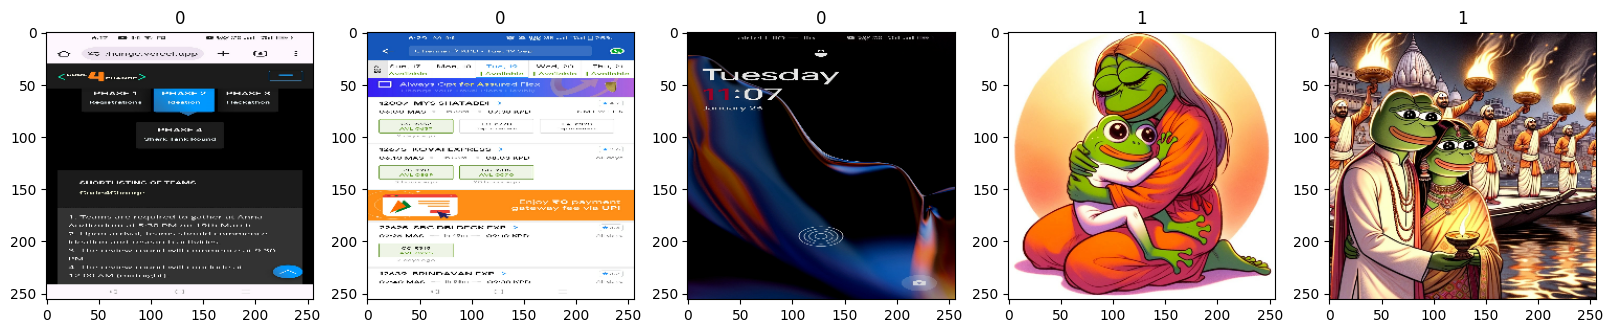

In [244]:
df = tf.keras.utils.image_dataset_from_directory('filess')
df = tf.keras.utils.image_dataset_from_directory('filess', batch_size=len(df))
data_iterator = df.as_numpy_iterator()

sets = data_iterator.next()

fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(sets[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(sets[1][idx])


4. SCALING

In [245]:
df = df.map(lambda x,y: (x/255, y))
df.as_numpy_iterator().next()
len(df)



32

5. SPLITTING THE DATASETS INTO TRAIN SET, CROSS EVALUATION SET, TEST SET


In [246]:
train_size = int(len(df)*0.7)
val_size = int(len(df)*0.2)
test_size = int(len(df)*0.1)

In [247]:
train = df.take(train_size)
val = df.skip(train_size).take(val_size)
test = df.skip(train_size+val_size).take(test_size)

In [248]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

6. BUILDING THE NEURAL NETWORK

In [249]:
model = Sequential()

In [250]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [251]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [252]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

7. TRAINING THE NEURAL NETWORK

In [253]:
logdir='logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])



Epoch 1/10


22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - accuracy: 0.7243 - loss: 0.7125 - val_accuracy: 0.9048 - val_loss: 0.3325
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.8920 - loss: 0.2712 - val_accuracy: 0.9206 - val_loss: 0.1567
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.9696 - loss: 0.0989 - val_accuracy: 0.9841 - val_loss: 0.0572
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.9846 - loss: 0.0353 - val_accuracy: 0.9603 - val_loss: 0.0634
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.9392 - loss: 0.1164 - val_accuracy: 0.9841 - val_loss: 0.0720
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.9879 - loss: 0.0402 - val_accuracy: 0.9841 - val_loss: 0.0484
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.9894 - loss: 0.0342 - val_accuracy: 0.9921 - val_loss: 0.0292
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.9983 - loss: 0.0116 - val_accuracy: 1.0000 - val_

8. PLOTTING THE LOSS FUNCTION AND ACCURACY GRAPHS

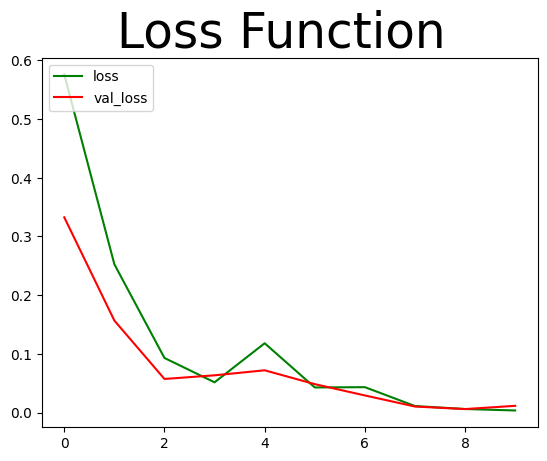

In [254]:
IMG = plt.figure()
plt.plot(hist.history['loss'], color='GREEN', label='loss')
plt.plot(hist.history['val_loss'], color='RED', label='val_loss')
IMG.suptitle('Loss Function', fontsize=35)
plt.legend(loc="upper left")
plt.show()

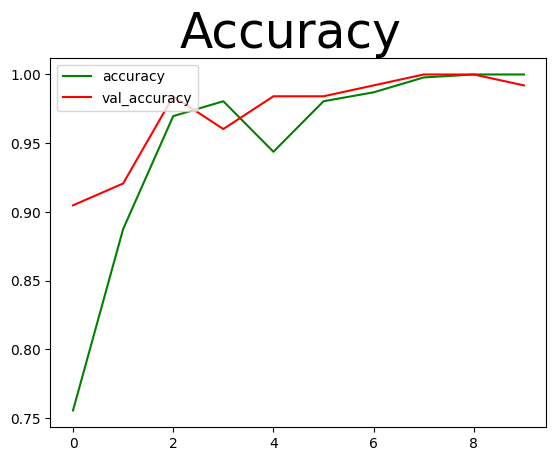

In [255]:
IMG = plt.figure()
plt.plot(hist.history['accuracy'], color='GREEN', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='RED', label='val_accuracy')
IMG.suptitle('Accuracy', fontsize=35)
plt.legend(loc="upper left")
plt.show()

9. EVALUATION

In [256]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print(pre.result(), re.result(), acc.result())



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


10. TESTING THE MODEL AGAINST RANDOM IMAGES

I) TO CHECK FOR NOT PEPE

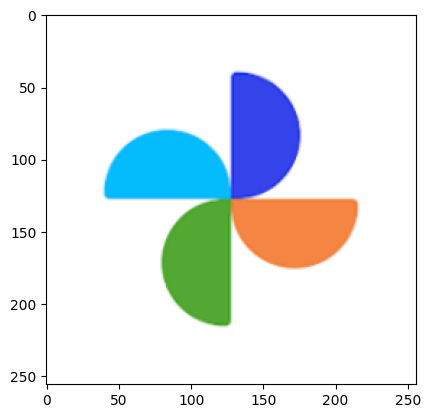

In [257]:
import cv2

img = cv2.imread('images.png')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()



In [258]:
ybar = model.predict(np.expand_dims(resize/255, 0))

ybar



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[0.10127603]], dtype=float32)

In [260]:
if ybar > 0.5:
    print(f'Pepe')
else:
    print(f'Not Pepe')

Not Pepe


II) CHECKING FOR PEPE

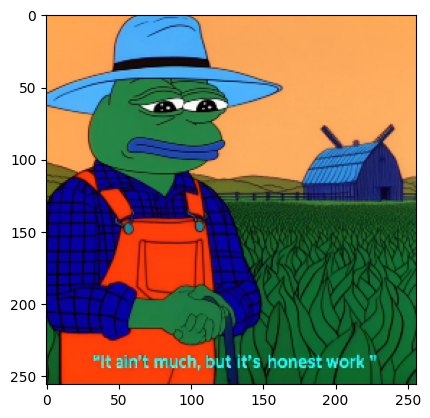

In [261]:
import cv2
img = cv2.imread('F8xF9gSWQAA1TPd.jpeg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [262]:
ybar = model.predict(np.expand_dims(resize/255, 0))

ybar

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[0.99983114]], dtype=float32)

In [264]:
if ybar > 0.5:
    print(f'Pepe')
else:
    print(f'Not Pepe')

Pepe
